# Prediction Delivery Time

# EDA Dataset

## Explore

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns   


In [8]:
df_ebay = pd.read_csv('../data/raw/ebayShort.csv', nrows=100000 ,index_col=0)

As the data is too big, we first working in the shortcut of the total data with 1 million rows.

In [9]:
# Look at the first 5 row

df_ebay.head()

,b2c_c2c,seller_id,declared_handling_days,acceptance_scan_timestamp,shipment_method_id,shipping_fee,carrier_min_estimate,carrier_max_estimate,item_zip,buyer_zip,category_id,item_price,quantity,payment_datetime,delivery_date,weight,weight_units,package_size,record_number
0,B2C,25454,3.0,2019-03-26 15:11:00.000-07:00,0,0.0,3,5,97219,49040,13,27.95,1,2019-03-24 03:56:49.000-07:00,2019-03-29,5,1,LETTER,1
1,C2C,6727381,2.0,2018-06-02 12:53:00.000-07:00,0,3.0,3,5,11415-3528,62521,0,20.50,1,2018-06-01 13:43:54.000-07:00,2018-06-05,0,1,PACKAGE_THICK_ENVELOPE,2
2,B2C,18507,1.0,2019-01-07 16:22:00.000-05:00,0,4.5,3,5,27292,53010,1,19.90,1,2019-01-06 00:02:00.000-05:00,2019-01-10,9,1,PACKAGE_THICK_ENVELOPE,3
3,B2C,4677,1.0,2018-12-17 16:56:00.000-08:00,0,0.0,3,5,90703,80022,1,35.50,1,2018-12-16 10:28:28.000-08:00,2018-12-21,8,1,PACKAGE_THICK_ENVELOPE,4
4,B2C,4677,1.0,2018-07-27 16:48:00.000-07:00,0,0.0,3,5,90703,55070,1,25.00,1,2018-07-26 18:20:02.000-07:00,2018-07-30,3,1,PACKAGE_THICK_ENVELOPE,5


In [10]:
#Look at 5 random row
df_ebay.sample(5)

,b2c_c2c,seller_id,declared_handling_days,acceptance_scan_timestamp,shipment_method_id,shipping_fee,carrier_min_estimate,carrier_max_estimate,item_zip,buyer_zip,category_id,item_price,quantity,payment_datetime,delivery_date,weight,weight_units,package_size,record_number
38849,B2C,9326,0.0,2019-01-13 05:18:00.000-06:00,0,0.00,3,5,60148,76549,2,30.00,1,2019-01-10 17:30:38.000-06:00,2019-01-16,0,1,PACKAGE_THICK_ENVELOPE,38850
74823,C2C,506268,2.0,2018-03-12 09:25:00.000-04:00,2,0.00,2,9,21713,91506,0,19.99,1,2018-03-09 21:56:09.000-05:00,2018-03-14,0,1,LETTER,74824
90464,C2C,107215,1.0,2018-08-24 10:59:00.000-06:00,3,2.66,2,8,57701,07631,17,6.99,1,2018-08-22 08:28:49.000-06:00,2018-08-31,16,1,PACKAGE_THICK_ENVELOPE,90465
96115,C2C,489000,1.0,2019-10-25 16:35:00.000-04:00,1,0.00,2,5,08401,03235,22,90.00,1,2019-10-25 09:16:22.000-04:00,2019-10-28,0,1,PACKAGE_THICK_ENVELOPE,96116
18921,B2C,20763,3.0,2018-08-15 20:06:00.000-07:00,2,0.00,2,9,91766,02860,0,11.98,1,2018-08-11 21:21:29.000-07:00,2018-08-17,0,1,NONE,18922


In [11]:
#check the shape of the dataset
df_ebay.shape

(100000, 19)

In [12]:
print(f'There are {df_ebay.shape[0]} columns and {df_ebay.shape[1]} rows')

There are 100000 columns and 19 rows


In [13]:
# Get a quick overview of dataset variables
df_ebay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   b2c_c2c                    100000 non-null  object 
 1   seller_id                  100000 non-null  int64  
 2   declared_handling_days     95042 non-null   float64
 3   acceptance_scan_timestamp  100000 non-null  object 
 4   shipment_method_id         100000 non-null  int64  
 5   shipping_fee               100000 non-null  float64
 6   carrier_min_estimate       100000 non-null  int64  
 7   carrier_max_estimate       100000 non-null  int64  
 8   item_zip                   100000 non-null  object 
 9   buyer_zip                  100000 non-null  object 
 10  category_id                100000 non-null  int64  
 11  item_price                 100000 non-null  float64
 12  quantity                   100000 non-null  int64  
 13  payment_datetime           100

In [14]:
# top 5 rows showing only 'object' columns
df_ebay.select_dtypes('object').head()

,b2c_c2c,acceptance_scan_timestamp,item_zip,buyer_zip,payment_datetime,delivery_date,package_size
0,B2C,2019-03-26 15:11:00.000-07:00,97219,49040,2019-03-24 03:56:49.000-07:00,2019-03-29,LETTER
1,C2C,2018-06-02 12:53:00.000-07:00,11415-3528,62521,2018-06-01 13:43:54.000-07:00,2018-06-05,PACKAGE_THICK_ENVELOPE
2,B2C,2019-01-07 16:22:00.000-05:00,27292,53010,2019-01-06 00:02:00.000-05:00,2019-01-10,PACKAGE_THICK_ENVELOPE
3,B2C,2018-12-17 16:56:00.000-08:00,90703,80022,2018-12-16 10:28:28.000-08:00,2018-12-21,PACKAGE_THICK_ENVELOPE
4,B2C,2018-07-27 16:48:00.000-07:00,90703,55070,2018-07-26 18:20:02.000-07:00,2018-07-30,PACKAGE_THICK_ENVELOPE


Let see the percent of the kind of customer B2C(Business to Consumer) and C2C(Consumer to Consumer)

Text(0.5, 1.0, 'portion of B2C and C2C')

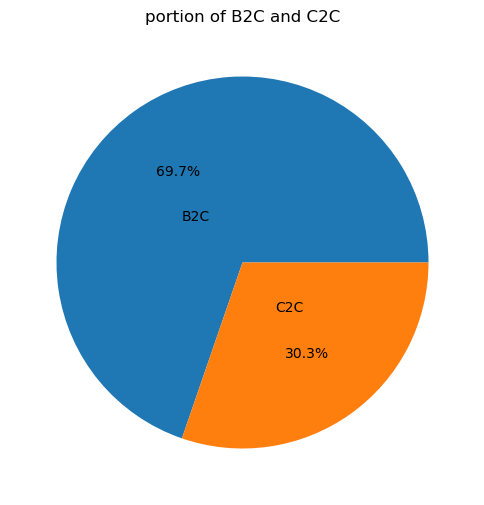

In [15]:
plt.figure(figsize=(6, 12))
plt.pie(df_ebay['b2c_c2c'].value_counts(), labels= df_ebay['b2c_c2c'].unique(), labeldistance=0.3, autopct='%1.1f%%')
plt.title('portion of B2C and C2C')

Seem like most of the seller is the business which take about 69.7% of the total amount of sale in the online selling platform. Consumer to consumer takes about 30.3% of the total amount, which is not a small amount, that we can see that there are more and more people start using the online platform to sell their product.

Let see how the seller declared the amount of time they need to proceesing order to make it ready to ship for customer base on there weight of the package>

In [31]:
df_ebay.groupby('declared_handling_days')['weight'].count().sort_values()

declared_handling_days
20.0       64
30.0       68
15.0       99
10.0      411
4.0       760
5.0      1460
0.0      6907
3.0     16582
2.0     17850
1.0     50841
Name: weight, dtype: int64

In [30]:
fig= px.bar(df_ebay, x= 'declared_handling_days', y= df_ebay['weight'])
fig.show()

## Data Cleaning

First let do some common checking in the dataset.
 -  Null value
 -  Duplicate row

In [ ]:
#Checking null
df_ebay.isna().sum()

There is 47180 missing value in total 1 million rows. We could delete it but I decide to have deepper look at it later


In [ ]:
# checking duplicate rows
df_ebay.duplicated().any()

There are no duplicate row in the database

In [ ]:
#recall shape column
df_ebay.shape[1]

Let check out the distributions, we are going to loop over the columns and print some subplot.

In [ ]:
#checking the b2c_c2c column
df_ebay['b2c_c2c'].value_counts()

Convert `b2c_c2c` column to binary

In [ ]:
df_ebay['b2c_c2c']= np.where(df_ebay['b2c_c2c']=='B2C', 1, 0)

Test it

In [ ]:
df_ebay.head()

There is 2 `weight_units` is 1 and 2. Let say 1 - 's' and 2 - 'kg'. We are going to convert all the weight units to lb.

In [ ]:
#check the record has weigtht unit =2 to able to compare
df_ebay[df_ebay['weight_units']==2].head()

In [ ]:
df_ebay['weight'] = np.where(df_ebay['weight_units']==1, df_ebay['weight'], df_ebay['weight']*2.20462 )

check the record with `weight_units`=2 to see if the `weight` column is change

In [ ]:
df_ebay[df_ebay['weight_units']==2]

All the `weight` with the `weight_units` = 2 are convert to the **lb** unit. So now we do not need to keep the weight column since all the weight is in the **lb**. Therefore, we are going to drop the `weight column`.

In [ ]:
df_ebay.drop(columns='weight', axis=1, inplace=True)


In [ ]:
#check it
df_ebay.info()

The `weigth` column has been dropped. Next we are going to calculate the distance between the buyer and the seller buy using there zip code in the `item_zip` and `buyer_zip` columns.

In [ ]:
#check any null value in these columns.
print(df_ebay['item_zip'].isna().any())
print(df_ebay['buyer_zip'].isna().any())

In [ ]:
item_zip= df_ebay['item_zip']
buyer_zip= df_ebay['buyer_zip']

In [ ]:
# function to calculate distance between 2 zip codeusing Geocode. this function take more time to process. So We change to other package 
# country = Nominatim(user_agent="US")
# distance= []
# def distance_cal(item_zip, buyer_zip):
# # for i in range(len(buyer_zip)):
#     if buyer_zip and item_zip:
#         location1= country.geocode(item_zip)
#         location2= country.geocode(buyer_zip)
#         if location1 is None or location2 is None:
#             return None
#         lat1 = location1.latitude 
#         lon1 = location1.longitude
#         lat2 = location2.latitude
#         lon2 = location2.longitude
#         # distance between them
#         if lat1 is not None or lon1 is not None or lat2 is not None or lon2 is not None:
#             return geodesic((lat1, lon1), (lat2, lon2)).miles
#         else:
#             return None
#     else:
#         return None   
    
# def add_distance_col(item_zip, buyer_zip):
#     item = item_zip.apply(lambda x: str(x))
#     buyer = buyer_zip.apply(lambda x: str(x))

#     zips= pd.concat([item, buyer], axis=1)
#     zips['distance']= zips.apply(lambda x: distance_cal(x.item_zip, x.buyer_zip), axis=1)
#     return(zips)
# add_distance_col(item_zip, buyer_zip)

In [ ]:
import mpu
from uszipcode import SearchEngine

def get_distance(item_zip, buyer_zip):
    """
    We are going to use the package mpu and uszipcode to imporve the speed of calculating the distance between buyer and seller by using zip code. 
    These 2 packages make the speed of calculation much faster compare with using the geopy package
    """
    if item_zip is not None and buyer_zip is not None:
        search = SearchEngine()
        item_location = search.by_zipcode(item_zip[0:5])
        buyer_location =search.by_zipcode(buyer_zip[0:5])
        if item_location is None or buyer_location is None:
            return None
        else:
            lat1 =item_location.lat
            long1 =item_location.lng
            lat2 =buyer_location.lat
            long2 =buyer_location.lng
            if lat1 is None or lat2 is None or long1 is None or long2 is None:
                return None
            return mpu.haversine_distance((lat1,long1),(lat2,long2)) 
    else:
        return None


def add_zip_distance_column(item_zip, buyer_zip):
    item_zip_str = item_zip.apply(lambda x: str(x))
    buyer_zip_str = buyer_zip.apply(lambda x: str(x))

    zips = pd.concat([item_zip_str, buyer_zip_str], axis=1)

    zips['distance'] = zips.apply(lambda x: get_distance(x.item_zip, x.buyer_zip), axis=1)
    
    return zips['distance']

In [ ]:
distance = add_zip_distance_column(item_zip, buyer_zip)

Add the value of the distance in to the data frame

In [ ]:
df_ebay['distance']= distance
df_ebay.head(10)

 we also delete the `buyer_zip` and `item_zip` column since it is no more usefull when we have the distance